In [631]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## Read Dataset

In [664]:
df = pd.read_csv('weatherHistory.csv')

In [665]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Cek tipe data

In [666]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

## Cek nilai null

In [667]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

## Data Spliting

In [672]:
X = df[['Humidity','Loud Cover','Temperature (C)','Wind Bearing (degrees)']]
Y = df[['Humidity','Loud Cover','Temperature (C)','Wind Bearing (degrees)']]

In [673]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1 , random_state=0)

In [674]:
X_test.shape

(9646, 4)

In [675]:
Y_test.shape

(9646, 4)

In [676]:
X_train.shape

(86807, 4)

In [677]:
Y_train.shape

(86807, 4)

## Model

In [678]:
model_mnist = Sequential()

## Input Layer

In [679]:
model_mnist.add(Dense(512, activation='relu', input_dim = 4))


## Hidden Layer

In [680]:
model_mnist.add(Dense(256, activation='relu'))
model_mnist.add(Dense(128, activation='relu'))

## Output Layer

In [681]:
model_mnist.add(Dense(4, activation='softmax'))

# Membuat DNN (Depp Neural Network)

In [682]:
model_mnist.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 512)               2560      
                                                                 
 dense_145 (Dense)           (None, 256)               131328    
                                                                 
 dense_146 (Dense)           (None, 128)               32896     
                                                                 
 dense_147 (Dense)           (None, 4)                 516       
                                                                 
Total params: 167,300
Trainable params: 167,300
Non-trainable params: 0
_________________________________________________________________


### Optimalisasi Model

In [683]:
model_mnist.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [684]:
hasil = model_mnist.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    batch_size = 128, 
    validation_data = (X_test, Y_test)
)

Epoch 1/10
679/679 [==============================] - 6s 7ms/step - loss: 758283136.0000 - accuracy: 0.9412 - val_loss: 3324297728.0000 - val_accuracy: 0.9439
Epoch 2/10
679/679 [==============================] - 5s 7ms/step - loss: 13037333504.0000 - accuracy: 0.9424 - val_loss: 27045847040.0000 - val_accuracy: 0.9439
Epoch 3/10
679/679 [==============================] - 5s 7ms/step - loss: 53637931008.0000 - accuracy: 0.9421 - val_loss: 84900438016.0000 - val_accuracy: 0.9437
Epoch 4/10
679/679 [==============================] - 5s 7ms/step - loss: 132864671744.0000 - accuracy: 0.9420 - val_loss: 188906864640.0000 - val_accuracy: 0.9437
Epoch 5/10
679/679 [==============================] - 5s 7ms/step - loss: 280299110400.0000 - accuracy: 0.9420 - val_loss: 379382136832.0000 - val_accuracy: 0.9437
Epoch 6/10
679/679 [==============================] - 5s 7ms/step - loss: 508441198592.0000 - accuracy: 0.9419 - val_loss: 662383034368.0000 - val_accuracy: 0.9437
Epoch 7/10
679/679 [=====

In [685]:
hasil.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

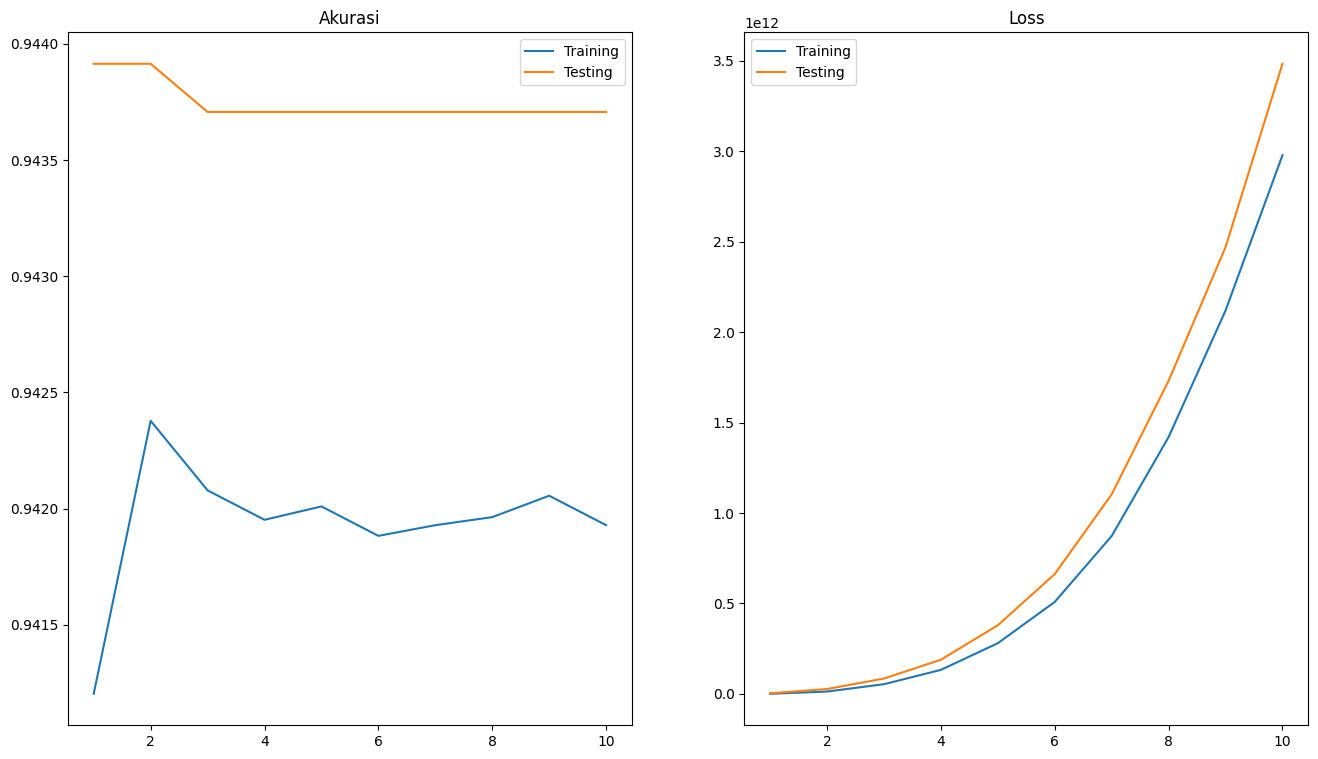

In [686]:
plt.figure(figsize=(16,9))

epochs_run = [i+1 for i in range(10)]

# Akurasi
plt.subplot(1,2,1)
plt.plot(epochs_run, hasil.history['accuracy'], label='Training')
plt.plot(epochs_run, hasil.history['val_accuracy'], label='Testing')
plt.title("Akurasi")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs_run, hasil.history['loss'], label='Training')
plt.plot(epochs_run, hasil.history['val_loss'], label='Testing')
plt.title("Loss")
plt.legend()

plt.show()

## Evaluasi Model

In [687]:
score = model_mnist.evaluate(X_test, Y_test)
print("Loss :",score[0])
print("Training :",score[1])

302/302 [==============================] - 1s 3ms/step - loss: 3482609254400.0000 - accuracy: 0.9437
Loss : 3482609254400.0
Training : 0.9437072277069092


In [688]:
print("Akurasi validasi :", hasil.history["val_accuracy"][-1] * 100, "%")
print("Akurasi :", hasil.history["accuracy"][-1] * 100, "%")

Akurasi validasi : 94.37072277069092 %
Akurasi : 94.19286251068115 %
